In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [10]:
#install the package and dataset
fasion_mnist= keras.datasets.fasion_mnist

AttributeError: module 'tensorflow_core.python.keras.api._v2.keras.datasets' has no attribute 'fasion_mnist'

In [4]:
fasion_mnist= keras.datasets.fashion_mnist

In [6]:
(train_images,train_lables),(test_images,test_labels)=fashion.mnist.load_data()

NameError: name 'fashion' is not defined

In [12]:
(train_images,train_lables),(test_images,test_labels)=fashion_mnist.load_data()

NameError: name 'fashion_mnist' is not defined

In [13]:
(train_images,train_lables),(test_images,test_labels)=fasion.mnist.load_data()

NameError: name 'fasion' is not defined

In [14]:
(train_images,train_lables),(test_images,test_labels)=fashion_mnist.load_data()

NameError: name 'fashion_mnist' is not defined

In [29]:
#set the labels
(train_images,train_lables),(test_images,test_labels)=fasion_mnist.load_data()

In [6]:
#class name
class_names=['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Shirt','Sneaker','Bag','Ankle boot']

In [17]:
train_image.shape

NameError: name 'train_image' is not defined

In [7]:
train_images.shape


(60000, 28, 28)

In [19]:
len(train_labels)

NameError: name 'train_labels' is not defined

In [8]:
len(train_lables)

60000

In [21]:
train_labels

NameError: name 'train_labels' is not defined

In [9]:
train_lables

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [12]:
test_images.shape

(10000, 28, 28)

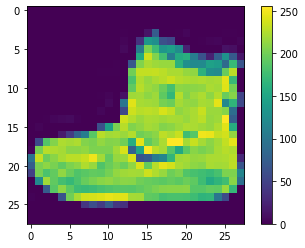

In [13]:
#check the img
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
#divide the pixel by 255
train_images=train_images/ 255.0
test_images=test_images/ 255.0

NameError: name 'train_labels' is not defined

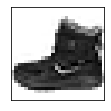

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

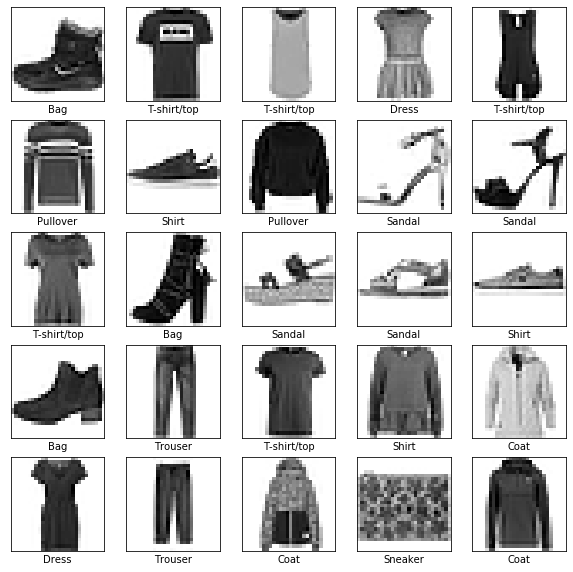

In [43]:
#display the images 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [16]:
#set up the layers
model= keras.Sequential([
    #transfom the format of image 2D array reformat
    keras.layers.Flatten(input_shape=(28,28)),
   #128 nodes  
    keras.layers.Dense(128, activation=tf.nn.relu),
    #
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [17]:
#comile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [18]:
#fit model for tranning data
model.fit(train_images, train_lables, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5005 - accuracy: 0.8262
Epoch 2/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3741 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3349 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3094 - accuracy: 0.8864
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2954 - accuracy: 0.8900
Epoch 6/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2798 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2725 - accuracy: 0.8985
Epoch 8/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2598 - accuracy: 0.9024
Epoch 9/10
60000/60000 [==============================] - 4s 65us/sample - loss: 0.2495 - accuracy: 0.9069
Epoch 10/10
60

In [19]:
#check the accuracy of your model
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('Test Accuracy', test_acc)

10000/10000 [==============================] - 1s 71us/sample - loss: 0.3550 - accuracy: 0.8758
Test Accuracy 0.8758


In [20]:
predictions=model.predict(test_images)

In [21]:
predictions[0]

array([1.5205176e-09, 2.1052739e-11, 8.8850854e-10, 2.0763558e-09,
       5.7600806e-11, 3.1869661e-04, 2.7054739e-07, 4.0929983e-03,
       2.1577442e-08, 9.9558806e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [24]:
print(test_labels[0])

9


In [38]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img= predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label=np.argmax(predictions_array)
    if predicted_label== true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label=predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot=plt.bar(range(10),predictions_array,color="#777777")
    plt.ylim([0,1])
    predicted_label=np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

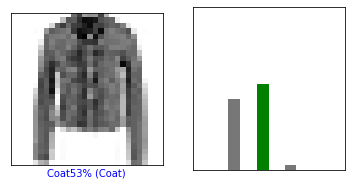

In [39]:
i=10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

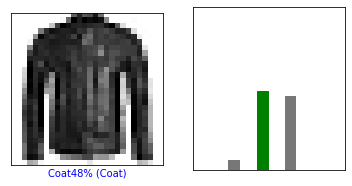

In [40]:
i=50
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

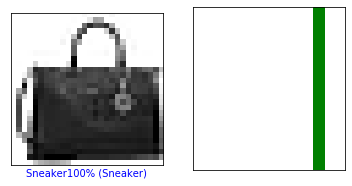

In [41]:
i=30
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

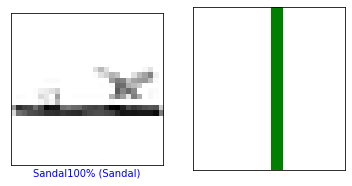

In [44]:
i=90
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

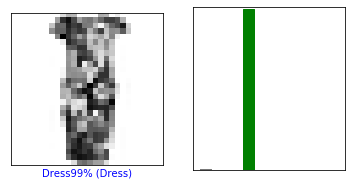

In [45]:
i=100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

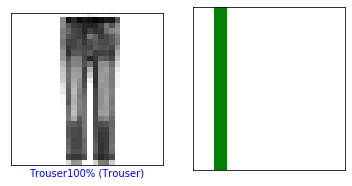

In [46]:
i=15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions, test_labels)
plt.show()

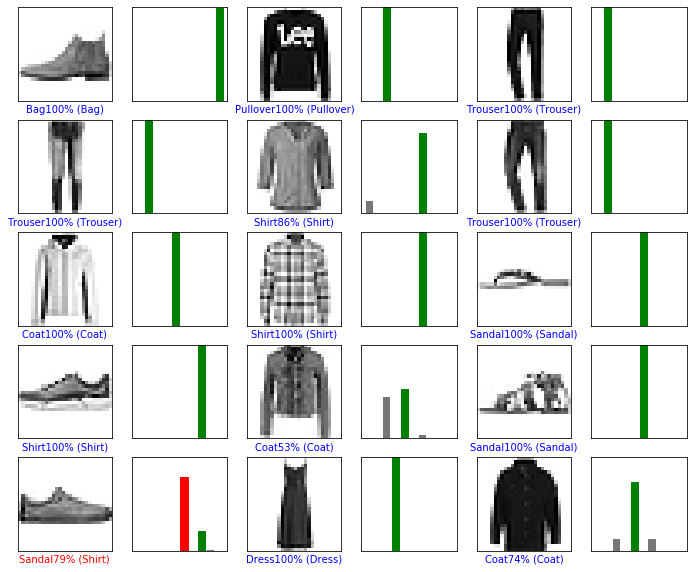

In [48]:
#printing many objects together with predicted graph
num_rows=5
num_cols=3

num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols, 2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i,predictions,test_labels)
    
plt.show()

In [50]:
#checking shape of img
img=test_images[0]
print(img.shape)

(28, 28)


In [51]:
img=(np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [53]:
predictions_single=model.predict(img)
print(predictions_single)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


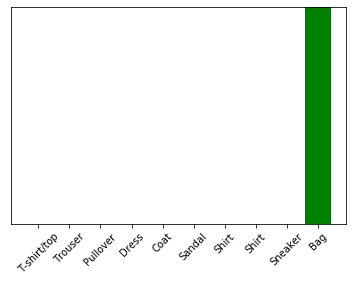

In [54]:
plot_value_array(0,predictions_single,test_labels)
_= plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(predictions_single[0])

9